## Model: 0.005 GeV + 3.0 GeV

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Reading 03_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



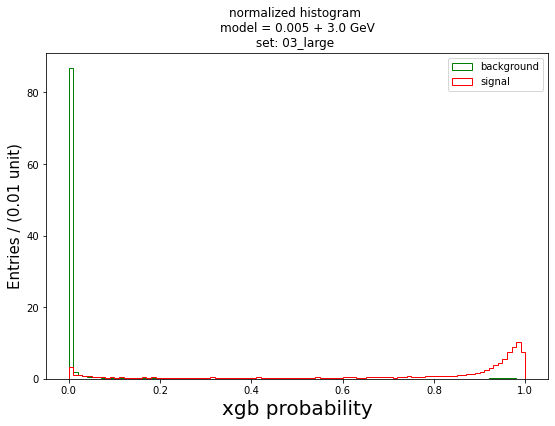

Reading 0_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



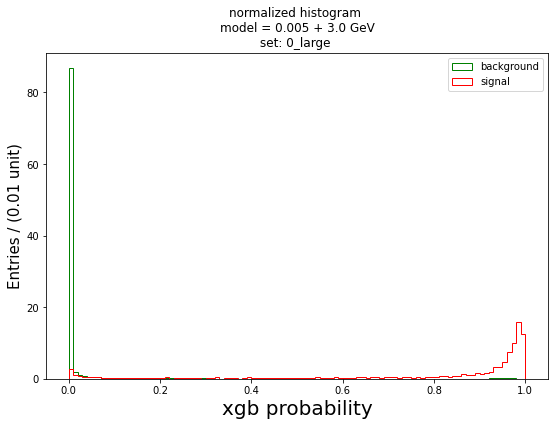

Reading 3_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



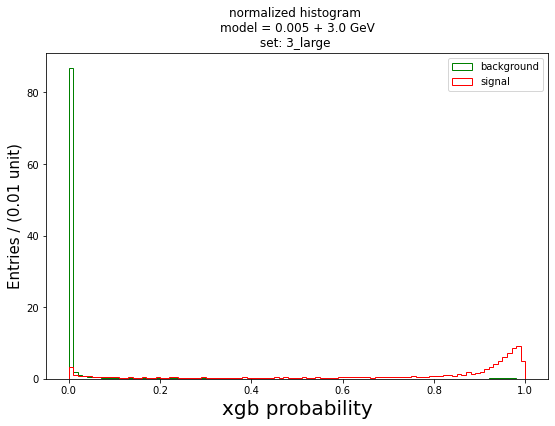

Reading 4_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



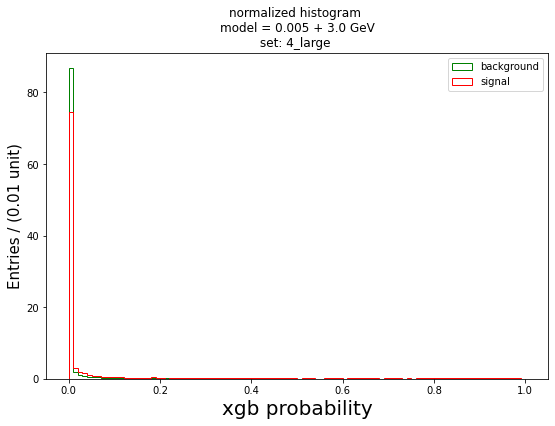

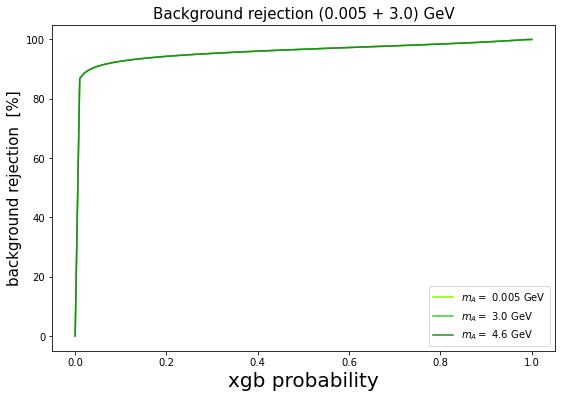

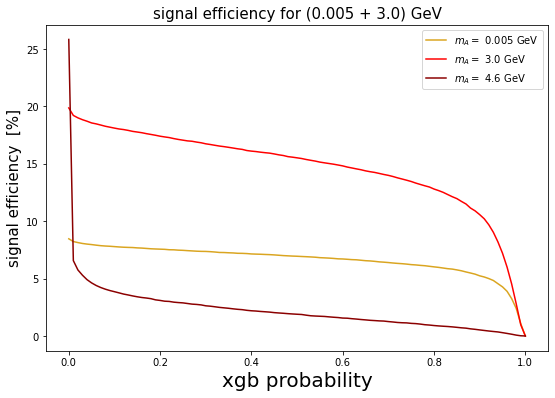

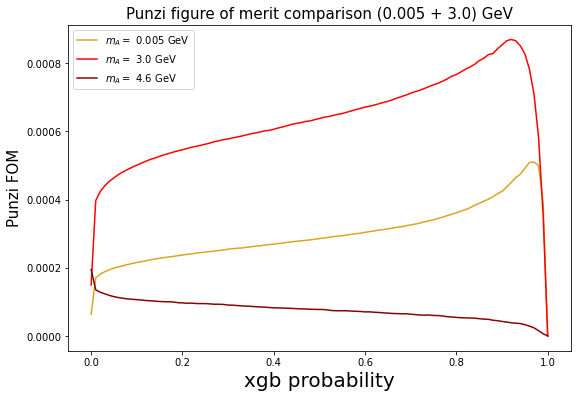

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


data = ["03_large","0_large","3_large","4_large"]

TP = []
FP = []
pfom_list = []
AUC = []
background_eff = []
signal_eff = []
binning = np.linspace(0,1,21)
for index in range(len(data)):
        print(f"Reading {data[index]}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{data[index]}.parquet")
        df = df.to_pandas()

        print("Completed!\n")
        print("Splitting Dataset:")
        X = df[df.columns[:-1]]    #exclude "signal" "classification"
        y = df["signal"]            
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
        print("Completed!\n")

        print("Getting probability from trainingsset and testingset")
        model = XGBClassifier()
        model.load_model("/ceph/aavocone/models/03_model500.txt")
        yprob = model.predict_proba(xtest)[:,1]
        print("Completed!\n")
        print("Getting efficiency values:")
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type = 1)
        background_eff.append(b)
        signal_eff.append(s)
        print("Completed!\n")
        auc =roc_auc_score(ytest,yprob)
        fp,tp, thresh = roc_curve(ytest, yprob)
        TP.append(tp)
        FP.append(fp)
        AUC.append(auc)
        pfom_list.append(fc.PFOM(s,b,bh,5))



        #histogram
        plt.figure(figsize=(9,6))
        plt.hist(bh,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
        plt.hist(sh,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
        plt.title(f"normalized histogram \nmodel = 0.005 + 3.0 GeV\n set: {data[index]}  ")
        plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.savefig(f"/work/aavocone/week14/multi_mass/model_03_{data[index]}_histogram.pdf", format="pdf",bbox_inches="tight")
        plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, (1-background_eff[1])*100, label = "$m_A =$ 0.005 GeV", color ="lawngreen")
plt.plot(bin_edges, (1-background_eff[2])*100, label = "$m_A =$ 3.0 GeV", color ="limegreen")
plt.plot(bin_edges, (1-background_eff[3])*100, label = "$m_A =$ 4.6 GeV", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection  [%]", fontsize = 15)
plt.title(f"Background rejection (0.005 + 3.0) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_03_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, (signal_eff[1])*100, label = "$m_A =$ 0.005 GeV", color = "goldenrod")
plt.plot(bin_edges, (signal_eff[2])*100, label = "$m_A =$ 3.0 GeV", color = "r")
plt.plot(bin_edges, (signal_eff[3])*100, label = "$m_A =$ 4.6 GeV", color = "darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency  [%]",fontsize=15)
plt.title(f"signal efficiency for (0.005 + 3.0) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_03_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, pfom_list[1], label = "$m_A =$ 0.005 GeV", color ="goldenrod")
plt.plot(bin_edges, pfom_list[2], label = "$m_A =$ 3.0 GeV", color ="red")
plt.plot(bin_edges, pfom_list[3], label = "$m_A =$ 4.6 GeV", color ="darkred")
plt.title("Punzi figure of merit comparison (0.005 + 3.0) GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/PFOM_model_03.pdf", format="pdf",bbox_inches="tight")
plt.show()




## Model: 0.005 + 4.6 GeV

Reading 04_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



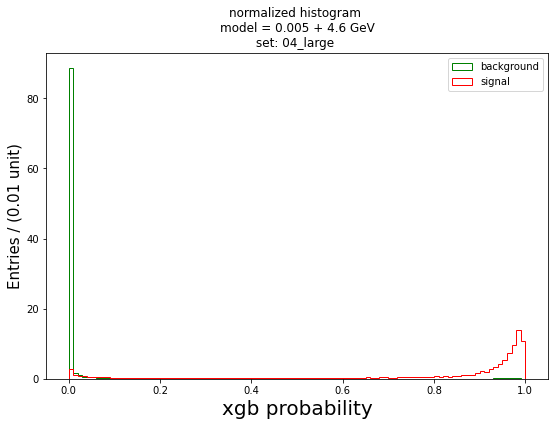

Reading 0_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



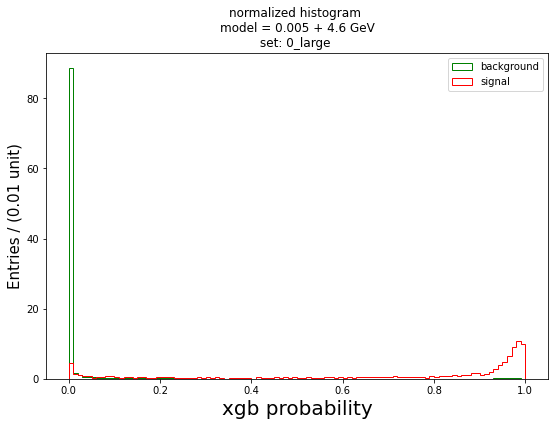

Reading 3_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



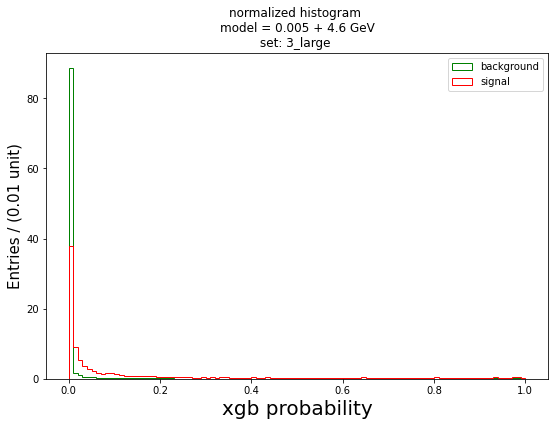

Reading 4_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



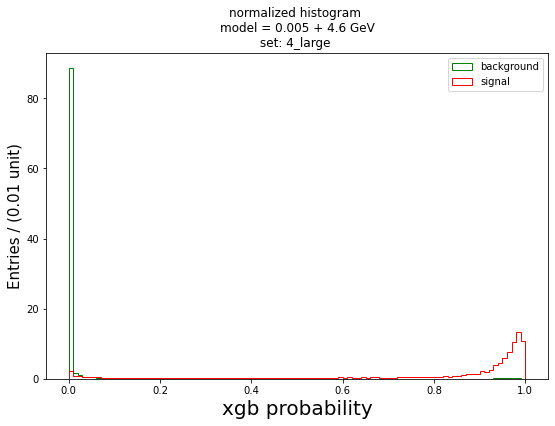

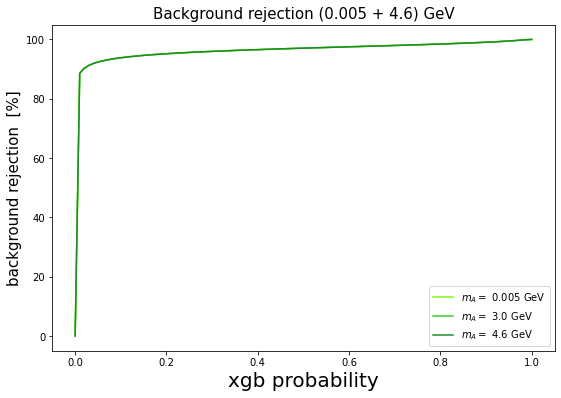

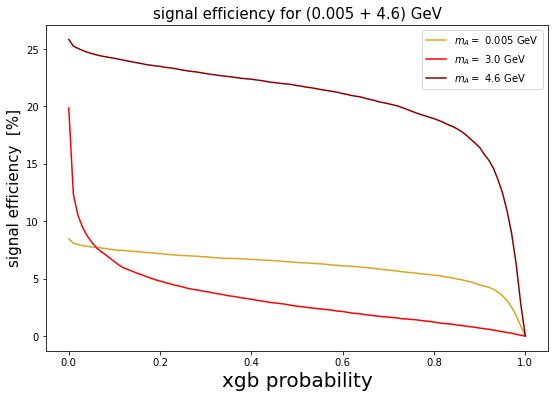

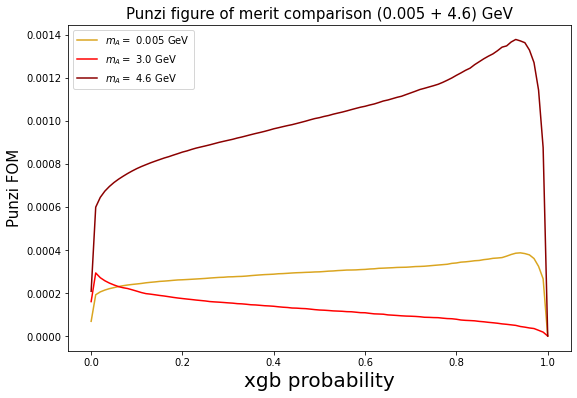

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

data = ["04_large","0_large","3_large","4_large"]

TP = []
FP = []
pfom_list = []
AUC = []
background_eff = []
signal_eff = []
binning = np.linspace(0,1,21)
for index in range(len(data)):
        print(f"Reading {data[index]}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{data[index]}.parquet")
        df = df.to_pandas()

        print("Completed!\n")
        print("Splitting Dataset:")
        X = df[df.columns[:-1]]    #exclude "signal" "classification"
        y = df["signal"]            
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
        print("Completed!\n")

        print("Getting probability from trainingsset and testingset")
        model = XGBClassifier()
        model.load_model("/ceph/aavocone/models/04_model500.txt")
        yprob = model.predict_proba(xtest)[:,1]
        print("Completed!\n")
        print("Getting efficiency values:")
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type = 1)
        background_eff.append(b)
        signal_eff.append(s)
        print("Completed!\n")
        auc =roc_auc_score(ytest,yprob)
        fp,tp, thresh = roc_curve(ytest, yprob)
        TP.append(tp)
        FP.append(fp)
        AUC.append(auc)
        pfom_list.append(fc.PFOM(s,b,bh,5))



        #histogram
        plt.figure(figsize=(9,6))
        plt.hist(bh,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
        plt.hist(sh,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
        plt.title(f"normalized histogram \nmodel = 0.005 + 4.6 GeV\n set: {data[index]}  ")
        plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.savefig(f"/work/aavocone/week14/multi_mass/model_04_{data[index]}_histogram.pdf", format="pdf",bbox_inches="tight")
        plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, (1-background_eff[1])*100, label = "$m_A =$ 0.005 GeV", color ="lawngreen")
plt.plot(bin_edges, (1-background_eff[2])*100, label = "$m_A =$ 3.0 GeV", color ="limegreen")
plt.plot(bin_edges, (1-background_eff[3])*100, label = "$m_A =$ 4.6 GeV", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection  [%]", fontsize = 15)
plt.title(f"Background rejection (0.005 + 4.6) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_04_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, (signal_eff[1])*100, label = "$m_A =$ 0.005 GeV", color = "goldenrod")
plt.plot(bin_edges, (signal_eff[2])*100, label = "$m_A =$ 3.0 GeV", color = "r")
plt.plot(bin_edges, (signal_eff[3])*100, label = "$m_A =$ 4.6 GeV", color = "darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency  [%]",fontsize=15)
plt.title(f"signal efficiency for (0.005 + 4.6) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_04_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, pfom_list[1], label = "$m_A =$ 0.005 GeV", color ="goldenrod")
plt.plot(bin_edges, pfom_list[2], label = "$m_A =$ 3.0 GeV", color ="red")
plt.plot(bin_edges, pfom_list[3], label = "$m_A =$ 4.6 GeV", color ="darkred")
plt.title("Punzi figure of merit comparison (0.005 + 4.6) GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/PFOM_model_04.pdf", format="pdf",bbox_inches="tight")
plt.show()


# Model: 3.0 + 4.6 GeV

Reading 34_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



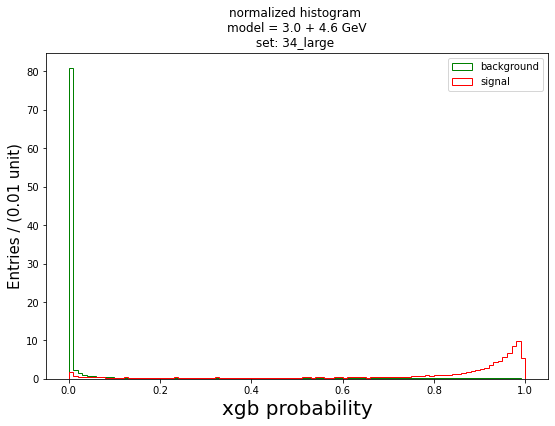

Reading 0_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



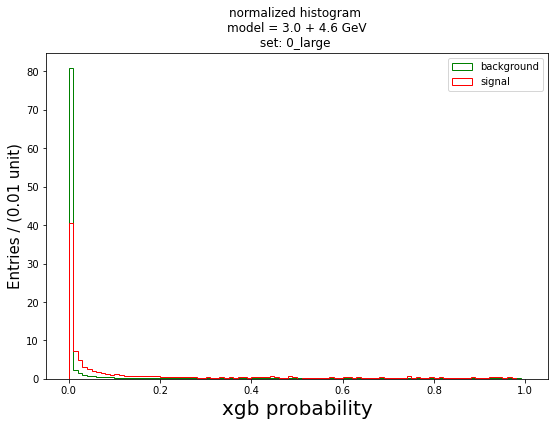

Reading 3_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



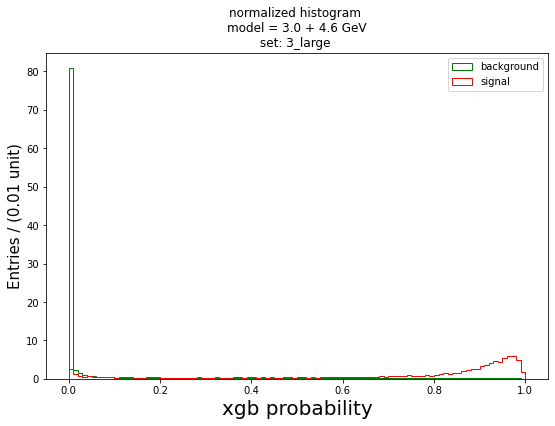

Reading 4_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



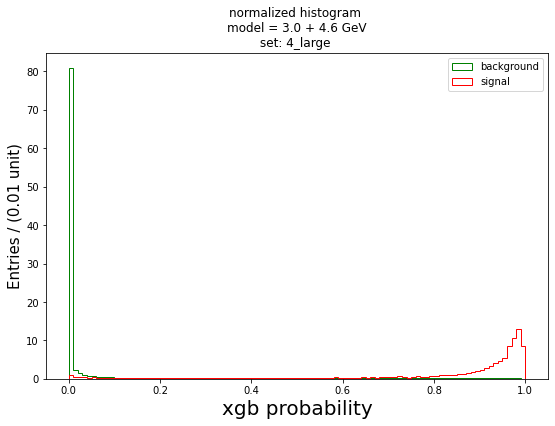

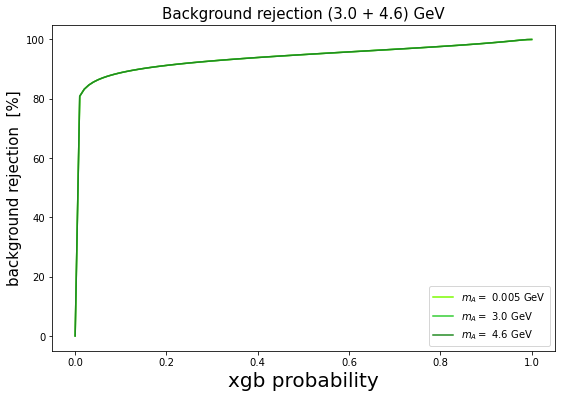

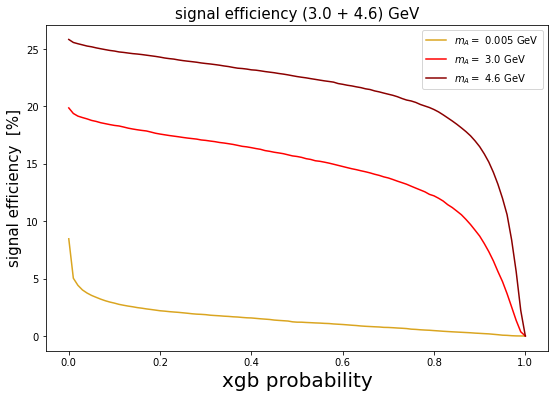

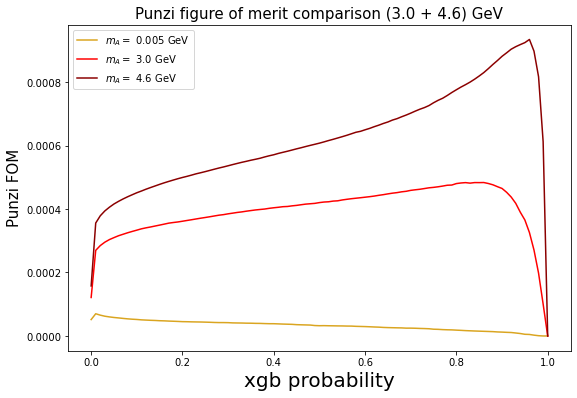

In [3]:
data = ["34_large","0_large","3_large","4_large"]

TP = []
FP = []
pfom_list = []
AUC = []
background_eff = []
signal_eff = []
binning = np.linspace(0,1,21)
for index in range(len(data)):
        print(f"Reading {data[index]}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{data[index]}.parquet")
        df = df.to_pandas()

        print("Completed!\n")
        print("Splitting Dataset:")
        X = df[df.columns[:-1]]    #exclude "signal" "classification"
        y = df["signal"]            
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)
        print("Completed!\n")

        print("Getting probability from trainingsset and testingset")
        model = XGBClassifier()
        model.load_model("/ceph/aavocone/models/34_model500.txt")
        yprob = model.predict_proba(xtest)[:,1]
        print("Completed!\n")
        print("Getting efficiency values:")
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type = 1)
        background_eff.append(b)
        signal_eff.append(s)
        print("Completed!\n")
        auc =roc_auc_score(ytest,yprob)
        fp,tp, thresh = roc_curve(ytest, yprob)
        TP.append(tp)
        FP.append(fp)
        AUC.append(auc)
        pfom_list.append(fc.PFOM(s,b,bh,5))



        #histogram
        plt.figure(figsize=(9,6))
        plt.hist(bh,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
        plt.hist(sh,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
        plt.title(f"normalized histogram \nmodel = 3.0 + 4.6 GeV\n set: {data[index]}  ")
        plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.savefig(f"/work/aavocone/week14/multi_mass/model_34_{data[index]}_histogram.pdf", format="pdf",bbox_inches="tight")
        plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, (1-background_eff[1])*100, label = "$m_A =$ 0.005 GeV", color ="lawngreen")
plt.plot(bin_edges, (1-background_eff[2])*100, label = "$m_A =$ 3.0 GeV", color ="limegreen")
plt.plot(bin_edges, (1-background_eff[3])*100, label = "$m_A =$ 4.6 GeV", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection  [%]", fontsize = 15)
plt.title(f"Background rejection (3.0 + 4.6) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_34_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, (signal_eff[1])*100, label = "$m_A =$ 0.005 GeV", color = "goldenrod")
plt.plot(bin_edges, (signal_eff[2])*100, label = "$m_A =$ 3.0 GeV", color = "r")
plt.plot(bin_edges, (signal_eff[3])*100, label = "$m_A =$ 4.6 GeV", color = "darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency  [%]",fontsize=15)
plt.title(f"signal efficiency (3.0 + 4.6) GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_34_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, pfom_list[1], label = "$m_A =$ 0.005 GeV", color ="goldenrod")
plt.plot(bin_edges, pfom_list[2], label = "$m_A =$ 3.0 GeV", color ="red")
plt.plot(bin_edges, pfom_list[3], label = "$m_A =$ 4.6 GeV", color ="darkred")
plt.title("Punzi figure of merit comparison (3.0 + 4.6) GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/PFOM_model_34.pdf", format="pdf",bbox_inches="tight")
plt.show()


# Model: All

## comparing 0.005, 3.0, 4.6

Reading all_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



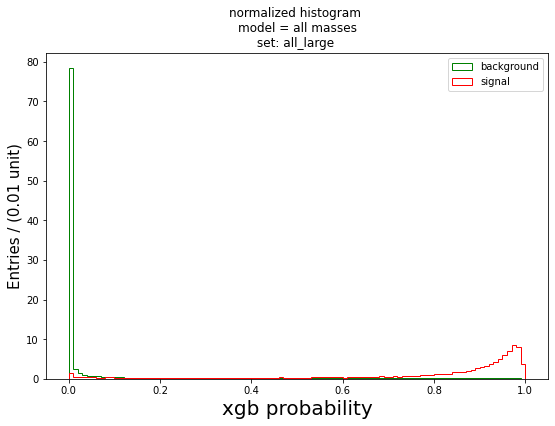

Reading 0_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



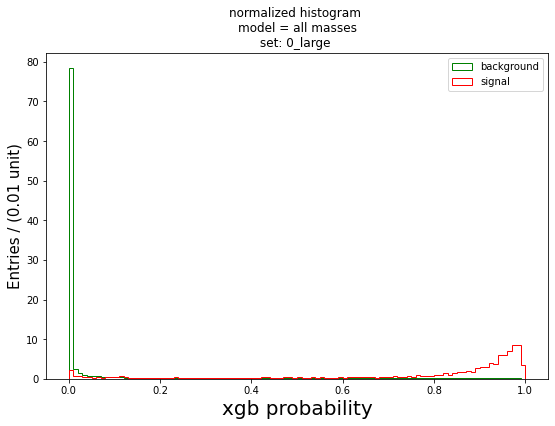

Reading 3_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



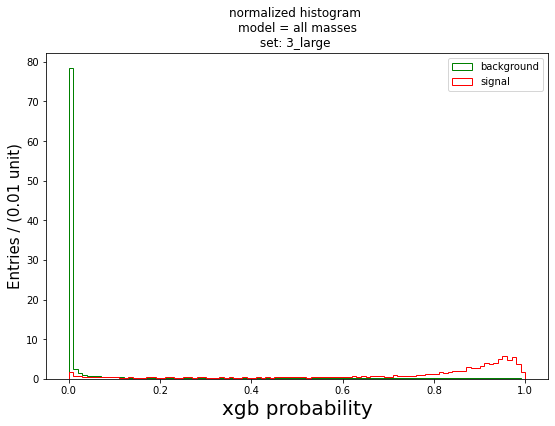

Reading 4_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



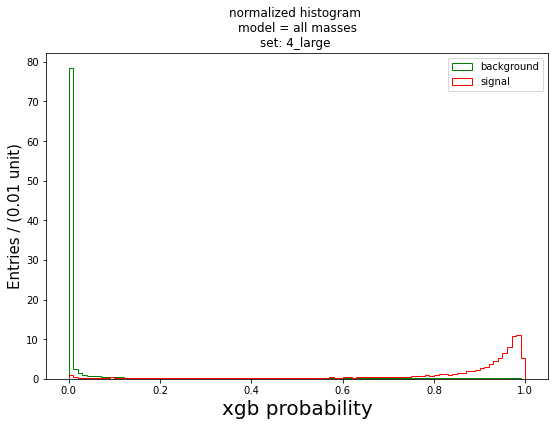

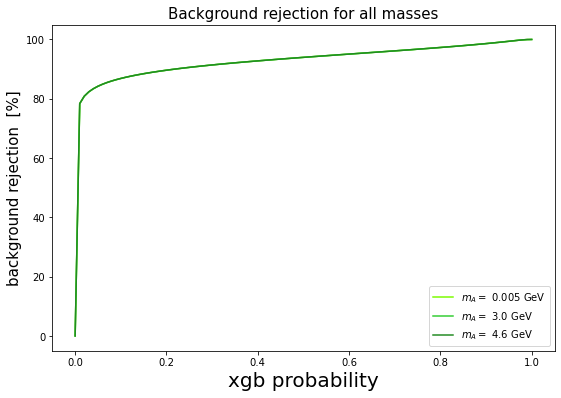

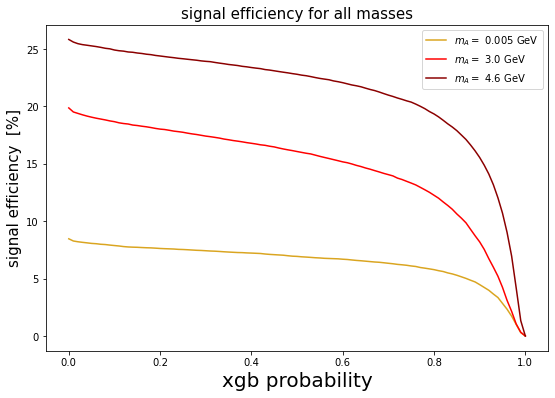

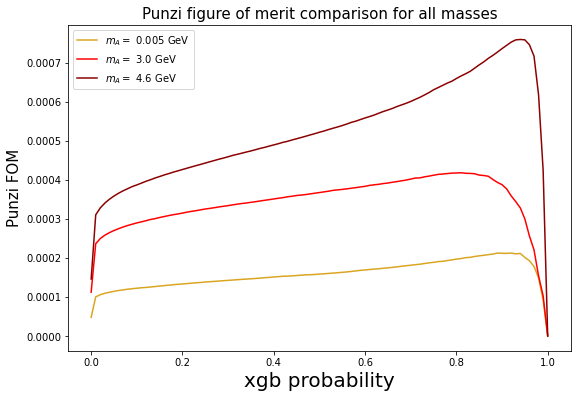

In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt



data = ["all_large","0_large","3_large","4_large"]

TP = []
FP = []
pfom_list = []
AUC = []
background_eff = []
signal_eff = []
binning = np.linspace(0,1,21)
for index in range(len(data)):
        print(f"Reading {data[index]}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{data[index]}.parquet")
        df = df.to_pandas()

        print("Completed!\n")
        print("Splitting Dataset:")
        X = df[df.columns[:-1]]    #exclude "signal" "classification"
        y = df["signal"]            
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify=ytrain)
        print("Completed!\n")

        print("Getting probability from trainingsset and testingset")
        model = XGBClassifier()
        model.load_model("/ceph/aavocone/models/all_model500.txt")
        yprob = model.predict_proba(xtest)[:,1]
        print("Completed!\n")
        print("Getting efficiency values:")
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type = 1)
        background_eff.append(b)
        signal_eff.append(s)
        print("Completed!\n")
        auc =roc_auc_score(ytest,yprob)
        fp,tp, thresh = roc_curve(ytest, yprob)
        TP.append(tp)
        FP.append(fp)
        AUC.append(auc)
        pfom_list.append(fc.PFOM(s,b,bh,5))



        #histogram
        plt.figure(figsize=(9,6))
        plt.hist(bh,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
        plt.hist(sh,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
        plt.title(f"normalized histogram \nmodel = all masses\n set: {data[index]}  ")
        plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_{data[index]}_histogram.pdf", format="pdf",bbox_inches="tight")
        plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, (1-background_eff[1])*100, label = "$m_A =$ 0.005 GeV", color ="lawngreen")
plt.plot(bin_edges, (1-background_eff[2])*100, label = "$m_A =$ 3.0 GeV", color ="limegreen")
plt.plot(bin_edges, (1-background_eff[3])*100, label = "$m_A =$ 4.6 GeV", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection  [%]", fontsize = 15)
plt.title(f"Background rejection for all masses", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, (signal_eff[1])*100, label = "$m_A =$ 0.005 GeV", color = "goldenrod")
plt.plot(bin_edges, (signal_eff[2])*100, label = "$m_A =$ 3.0 GeV", color = "r")
plt.plot(bin_edges, (signal_eff[3])*100, label = "$m_A =$ 4.6 GeV", color = "darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency  [%]",fontsize=15)
plt.title(f"signal efficiency for all masses", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, pfom_list[1], label = "$m_A =$ 0.005 GeV", color ="goldenrod")
plt.plot(bin_edges, pfom_list[2], label = "$m_A =$ 3.0 GeV", color ="red")
plt.plot(bin_edges, pfom_list[3], label = "$m_A =$ 4.6 GeV", color ="darkred")
plt.title("Punzi figure of merit comparison for all masses",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week14/multi_mass/PFOM_model_all.pdf", format="pdf",bbox_inches="tight")
plt.show()


## comparing new masses (0.1, 0.3, 0.5, 1, 2, 4)

Reading 0_1_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



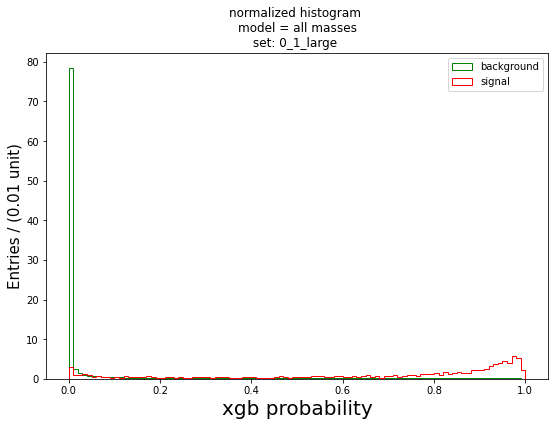

Reading 0_3_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



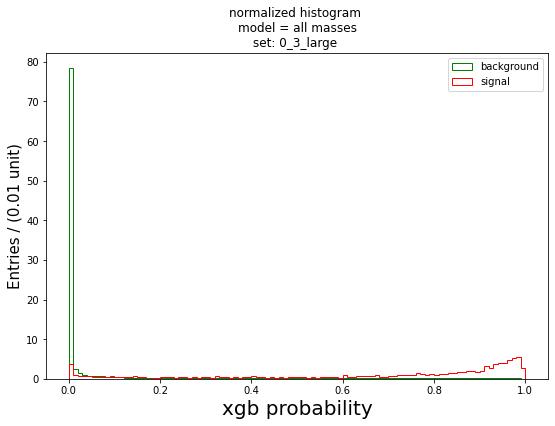

Reading 0_5_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



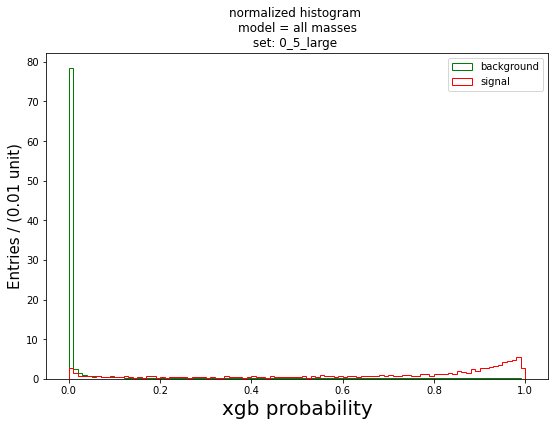

Reading 1_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



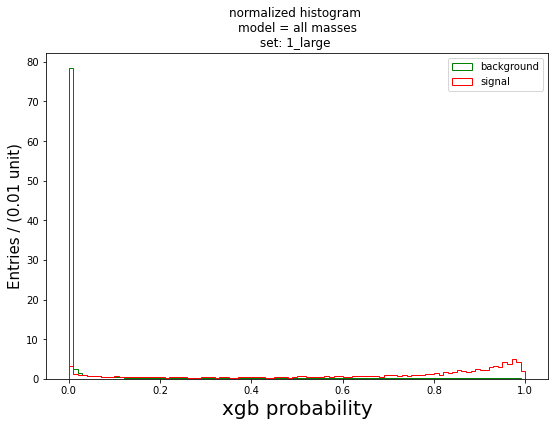

Reading 2_large...
Completed!

Splitting Dataset:
Completed!

Getting probability from trainingsset and testingset
Completed!

Getting efficiency values:
Completed!



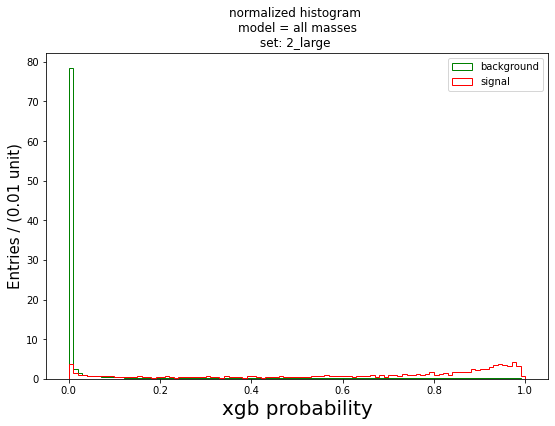

Reading 4_0_large...
Completed!

Splitting Dataset:


In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt



data = ["0_1_large","0_3_large","0_5_large","1_large","2_large","4_0_large"]

TP = []
FP = []
pfom_list = []
AUC = []
background_eff = []
signal_eff = []
binning = np.linspace(0,1,21)
for index in range(len(data)):
        print(f"Reading {data[index]}...")
        df = pq.read_table(f"/ceph/aavocone/Datasets/{data[index]}.parquet")
        df = df.to_pandas()

        print("Completed!\n")
        print("Splitting Dataset:")
        X = df[df.columns[:-1]]    #exclude "signal" "classification"
        y = df["signal"]            
        xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
        xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5, stratify=ytrain)
        print("Completed!\n")

        print("Getting probability from trainingsset and testingset")
        model = XGBClassifier()
        model.load_model("/ceph/aavocone/models/all_model500.txt")
        yprob = model.predict_proba(xtest)[:,1]
        print("Completed!\n")
        print("Getting efficiency values:")
        sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type = 1)
        background_eff.append(b)
        signal_eff.append(s)
        print("Completed!\n")
        #auc =roc_auc_score(ytest,yprob)
        #fp,tp, thresh = roc_curve(ytest, yprob)
        #TP.append(tp)
        #FP.append(fp)
        #AUC.append(auc)
        pfom_list.append(fc.PFOM(s,b,bh,5))



        #histogram
        plt.figure(figsize=(9,6))
        plt.hist(bh,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
        plt.hist(sh,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
        plt.title(f"normalized histogram \nmodel = all masses\n set: {data[index]}  ")
        plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
        plt.xlabel("xgb probability", fontsize = 20)
        plt.legend()
        #plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_{data[index]}_histogram.pdf", format="pdf",bbox_inches="tight")
        plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, (1-background_eff[1])*100, label = "$m_A =$ 0.005 GeV", color ="lawngreen")
plt.plot(bin_edges, (1-background_eff[2])*100, label = "$m_A =$ 3.0 GeV", color ="limegreen")
plt.plot(bin_edges, (1-background_eff[3])*100, label = "$m_A =$ 4.6 GeV", color ="forestgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection  [%]", fontsize = 15)
plt.title(f"Background rejection for all masses", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, (signal_eff[1])*100, label = "$m_A =$ 0.005 GeV", color = "goldenrod")
plt.plot(bin_edges, (signal_eff[2])*100, label = "$m_A =$ 3.0 GeV", color = "r")
plt.plot(bin_edges, (signal_eff[3])*100, label = "$m_A =$ 4.6 GeV", color = "darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency  [%]",fontsize=15)
plt.title(f"signal efficiency for all masses", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week14/multi_mass/model_all_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(bin_edges, pfom_list[1], label = "$m_A =$ 0.005 GeV", color ="goldenrod")
plt.plot(bin_edges, pfom_list[2], label = "$m_A =$ 3.0 GeV", color ="red")
plt.plot(bin_edges, pfom_list[3], label = "$m_A =$ 4.6 GeV", color ="darkred")
plt.title("Punzi figure of merit comparison for all masses",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig(f"/work/aavocone/week14/multi_mass/PFOM_model_all.pdf", format="pdf",bbox_inches="tight")
plt.show()
